In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset1 = pd.read_csv('US_Accidents_Dec19.csv')
dataset = dataset1.iloc[0:100000,:]
dataset.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
dataset.shape

(100000, 49)

In [4]:
dataset.rename(columns = {'Temperature(F)':'Temperature_F', 'Wind_Chill(F)':'Wind_Chill_F',  'Pressure(in)':'Pressure_in', 'Visibility(mi)':'Visibility_mi','Wind_Speed(mph)':'Wind_Speed_mph', 'Humidity(%)':'Humidity','Distance(mi)':'Distance_mi','Precipitation(in)':'Precipitation_in'}, inplace = True) 

C:\Users\saich\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
dataset.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance_mi',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature_F', 'Wind_Chill_F', 'Humidity', 'Pressure_in',
       'Visibility_mi', 'Wind_Direction', 'Wind_Speed_mph', 'Precipitation_in',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [6]:
dataset.describe(include='all')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,100000,100000,100000.000000,100000.000000,100000,100000,100000.000000,100000.000000,0.0,0.0,...,100000,100000,100000,100000,100000,100000,99999,99999,99999,99999
unique,100000,2,NaN,NaN,81768,81216,NaN,NaN,NaN,NaN,...,2,2,2,2,2,1,2,2,2,2
top,A-79673,MapQuest,NaN,NaN,10-04-2016 08:59,14-10-2016 19:50,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,99949,NaN,NaN,35,24,NaN,NaN,NaN,NaN,...,99994,97481,98087,99966,91114,100000,62505,66173,70261,74320
mean,NaN,NaN,208.453460,2.448120,NaN,NaN,35.630382,-119.322772,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,18.367503,0.499931,NaN,NaN,2.101245,3.663519,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,200.000000,1.000000,NaN,NaN,32.542587,-123.813927,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,201.000000,2.000000,NaN,NaN,33.957775,-121.828468,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,201.000000,2.000000,NaN,NaN,34.168579,-118.384232,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,201.000000,3.000000,NaN,NaN,37.776682,-117.916023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  100000
End_Lng                  100000
Distance_mi                   0
Description                   0
Number                    76897
Street                        0
Side                          0
City                          1
County                        0
State                         0
Zipcode                       7
Country                       0
Timezone                      7
Airport_Code                  7
Weather_Timestamp          1054
Temperature_F              1591
Wind_Chill_F              95678
Humidity                   1856
Pressure_in                1292
Visibility_mi              1846
Wind_Direction             1064
Wind_Speed_mph            23823
Precipitation_in          92632
Weather_

In [8]:
data = dataset.drop(columns=['End_Lat','End_Lng','Number','Wind_Chill_F','Precipitation_in','Start_Time','End_Time','Start_Lat','Start_Lng','Description','ID'])

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

Source                   0
TMC                      0
Severity                 0
Distance_mi              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature_F            0
Humidity                 0
Pressure_in              0
Visibility_mi            0
Wind_Direction           0
Wind_Speed_mph           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
A

In [10]:
data.shape

(74916, 38)

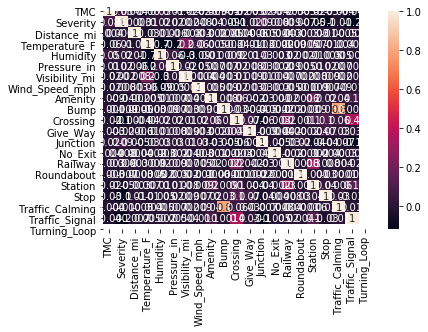

In [11]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,fmt='.0g', robust=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['Source', 'TMC', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
        'Wind_Direction','Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [13]:
data.head()

,Source,TMC,Severity,Distance_mi,Street,Side,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,0,1,2,0.01,6614,2,732,8,1,165,...,0,0,0,0,1,0,1,1,0,0
3,0,1,3,0.01,3251,2,169,36,1,303,...,0,0,0,0,0,0,1,0,0,0
4,0,1,2,0.01,4165,2,169,36,1,363,...,0,0,0,0,1,0,0,0,0,0
5,0,1,3,0.01,7636,2,724,18,1,17,...,0,0,0,0,0,0,0,0,0,0
6,0,1,2,0.00,4697,2,169,36,1,309,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = data.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]].values
y = data.iloc[:, 2].values


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.feature_selection import RFECV
clf_rf=RandomForestClassifier()
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='accuracy')
rfecv=rfecv.fit(X_train,y_train)

C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [19]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

#Selecting the Important Features
opt_feat = list((X_train.columns[rfecv.support_]))
X_opt = X_train.iloc[:,opt_feat]
X_test = X_test.iloc[:,opt_feat]

In [20]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 2
Best features : Int64Index([3, 8], dtype='int64')


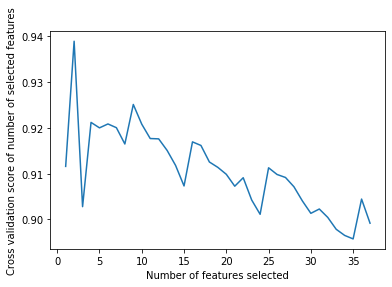

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_opt, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0   10    2    0]
 [   0 7641 2597    0]
 [   0 3094 5381    0]
 [   0    2    2    0]]


In [25]:
from sklearn.metrics import accuracy_score 
acs = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
acs*100

69.52853862993219

In [27]:
from sklearn.metrics import cohen_kappa_score 
kappa = cohen_kappa_score(y_test, y_pred)
kappa

0.3825171784169753